
# EQUATION DE DIFFUSIVITE

Pour un écoulement monodimensionnel dans un milieu poreux homogène saturé d'épaisseur constante, l'équation de diffusivité peut s'écrire pour la hauteur piézométrique $ h$:

$$
\frac{\partial}{\partial x}\left({K\frac{\partial h}{\partial x}}\right) = S_s \frac{dh}{dt}
$$

avec $K$ ($m.s^{-1}$) la conductivité hydraulique, $S_s$ ($m^{-1}$) le coefficient d'emmagasinement spécifique.

Pour un aquifère confiné d'épaisseur $b$
- la transmissivité $T_c$ est:
$$ T_c = Kb $$

- le coefficient d'emmagasinement $S$:
$$ S = S_s b $$

et l'équation de diffusivité:
$$
T_c\frac{d^2 h}{dx^2} = S \frac{dh}{dt}
$$

Pour une nappe libre, la transmissivité $T_l$ est directement fonction de l'épaisseur saturée, exprimée par la hauteur piézométrique $h$ si le repère d'altitude est pris au mur de l'aquifère:

$$ T_l = Kh $$

et l'équation de diffusivité:
$$
\frac{\partial}{\partial x}\left({Kh\frac{\partial h}{\partial x}}\right) = S \frac{dh}{dt}
$$

Pour caractériser un système aquifère, il est commun d'introduire la diffusivité $D$ ($m^2.s^{-1}$) telle que:

$$ D = \frac{T}{S}  $$



<a id='nappe_captive'></a>
## Ecoulement mono-dimensionnel en régime permanent en nappe captive

On considère un aquifère d'épaisseur constante b = 20 mètres. Le niveau piézométrique chute de 5 mètres entre 2 piézomètres situés à 500 m de distance. La conductivité hydraulique est K = 1e-4 m/s et la porosité efficace est de 0.15.
Le modèle conceptuel est donné ci-après.


<figure>
  <IMG SRC="laplace_captif.png" WIDTH=800 ALIGN="center">
</figure>


### Question

#### Retrouver l'équation de la hauteur piézométrique entre les 2 piézomètres en considérant un écoulement en régime permanent et tracer le profil piézométrique entre les deux piézométres

    
Pour un écoulement monodimensionnel, l'équation de diffusivité peut s'écrire:

$$
\frac{\partial}{\partial x}\left({Kb\frac{\partial h}{\partial x}}\right) = S \frac{dh}{dt}
$$

Pour une nappe captive homogène, si l'aquifère présente une épaisseur constante, le produit $Kb$  qui correspond à la transmissivité est constant et est indépendant de la hauteur piézométrique $h$.

Le régime d'écoulement considéré dans le cas présent est permanent (pas de variation au cours du temps), donc:

$$
\frac{dh}{dt} = 0
$$

Pour l'équation de diffusivité, on obtient:

$$
\frac{d^2 h}{dx^2} = 0
$$


L'équation différentielle peut être résolue par intégrations successives:

$$
\frac{d^2 h}{dx^2}  = 0 = \frac{d \left( {\frac{dh}{dx}} \right)}{dx}
$$

Intégration 1:

$$
\frac{dh}{dx} = C
$$

avec C constante d'intégration.

Intégration 2:

$$
\frac{dh}{dx} = C \Longrightarrow h(x) = Cx + D
$$

avec D deuxième constante d'intégration.

Pour les conditions limites suivantes:
- $ h = h_0 $ pour $ x = 0 $ donc $h(0) = C\times0 + D $ soit $ D = h_0 $
- $ h = h_L $ pour $ x = L $ donc $h(D) = C.L + h_0 $ soit $ C = \frac{h_L - h_0}{L}$

$$
h = \frac{h_L - h_0}{L}x + h_0
$$
    

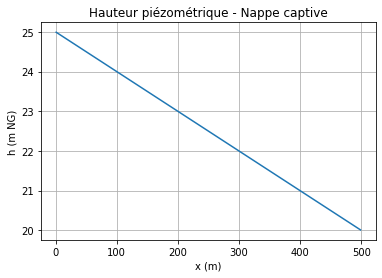

In [11]:
#profil piézométrique
import numpy as np
import scipy.special as sp
import matplotlib.pyplot as plt

K = 1.4e-4 # m/s
b = 20 #metres
T = K * b * 86400 #m2/j
omega = 0.15

h0 = 25 #mNG
hL = 20 #mNG
L = 500 #m

x = np.arange(1,L,1)
h = ((hL - h0)/L) * x + h0

plt.title('Hauteur piézométrique - Nappe captive')
plt.xlabel('x (m)')
plt.ylabel('h (m NG)')
plt.grid()
plt.plot(x,h)
plt.show()

### Question

#### Déterminer le débit transitant au sein de l'aquifère en considérant un front d'emprunt W de large



Par application de la loi de Darcy, le flux spécifique $q$ transitant à travers l'aquifère peut être exprimé par:
    
$$
q = -Kb\frac{dh}{dx}
$$

Si on connaît les valeurs $h_0$ et $h_L$ en deux points de la nappe distants de $L$ est:
$$
q = Kb\left({ \frac{h_0 - h_L}{L}} \right)
$$

soit pour un front d'écoulement $W$ mètres:
$$
Q_W = q W
$$


In [13]:
# debit transitant dans l'aquifere sur 10 m de front d'emprunt
W = 10 #front d'emprunt (m)

Q = (K * 86400 * b * (h0-hL)/L) * W

print('Le débit transitant au sein de l"aquifère est Q = {:.3g} m3/jour'.format(Q))


Le débit transitant au sein de l"aquifère est Q = 24.2 m3/jour


### Question

#### Déterminer la vitesse de circulation du fluide au sein de l'aquifère

La vitesse de circulation réelle $u$ est obtenue à partir de la vitesse de Darcy $q = Q/A$ et de la porosité efficace $\omega$:
$$
u = q / \omega
$$

In [6]:
# vitesse de circulation du fluide au sein de l'aquifère

u = (K * (h0-hL)/L) / omega * 86400

print('vitesse de circulation du fluide au sein de l"aquifère u = {:.3g} m/jour'.format(u))


vitesse de circulation du fluide au sein de l"aquifère u = 0.806 m/jour


<a id='nappe_libre'></a>

## 2. Ecoulement mono-dimensionnel en régime permanent en nappe libre


<figure>
  <IMG SRC="laplace_libre.png" WIDTH=800 ALIGN="center">
</figure>

On considère une nappe libre homogène en connexion hydraulique avec 2 plans d'eau distant de $L = {500}$ mètres. Les épaisseurs saturées au niveau  des plans d'eau sont $H_0 = 20$ mètres  et $H_L = 15$ mètres. L'aquifère peut être soumis à un flux de recharge pluviométrique homogène $N$.


### Question

#### Retrouver l'équation de la hauteur piézométrique entre les 2 plans d'eau en considérant un écoulement en régime permanent, sans recharge pluviométrique puis en prenant en compte une recharge pluviométrique homogène N sur l'aquifère

On souhaite exprimer la distribution spatiale de la hauteur piézométrique au sein d'une nappe libre homogène pour un écoulement en régime permanent. La nappe peut être soumise à une recharge uniforme depuis la surface.
Le modèle conceptuel est donné ci-après.

<figure>
  <IMG SRC="2Drechargeb.png" WIDTH=600 ALIGN="center">
</figure>

Pour un écoulement monodimensionnel en nappe libre en prenant en compte un terme puits/source N (recharge), l'équation de diffusivité peut s'écrire:

$$
\frac{\partial}{\partial x}\left(Kh	\frac{\partial h}{\partial x}\right) + N = S	\frac{\partial h}{\partial t}
$$

En réarrangeant les termes et en passant aux dérivées totales, l'équation précédente peut se réécrire pour le régime permanent:
$$    
\frac{\partial}{\partial x}\left(Kh	\frac{\partial h}{\partial x}\right) + N = 0   
$$
$$    
\frac{d}{d x}\left(h\frac{d h}{d x}\right)  = -\frac{N}{K}
$$
    1ère intégration
$$    
h\frac{d h}{d x}  = -\frac{N}{K}x + C1
$$
   2ème intégration
   
$$
\frac{1}{2} h^2 = -\frac{1}{2} \frac{N}{K}x^2 + C_1 x + C_2
$$

    
Pour le modèle considéré, nous retenons les conditions limites suivantes:
- $ h = h_0 $ pour $ x = 0 $ 
- $ h = h_L $ pour $ x = L $
    
La résolution de la primitive pour les conditions limites amène à l'équation de la surface piézométrique suivante pour la nappe libre soumise à recharge:
$$
h = \sqrt{h_0^2 + \frac{h_L^2-h_0^2}{L}x - \frac{N}{K}(L-x)x}
$$

### Question 2.b

Tracer le profil piézométrique entre les 2 cours d'eau en considérant une recharge efficace $N = 300$ mm d'eau par an

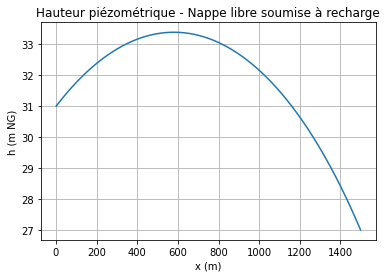

In [9]:
import numpy as np
import scipy.special as sp
import matplotlib.pyplot as plt

K = 1.8 #m/j
h0 = 31 #mNG
hL = 27 #mNG
N = - 0.3 #m H2O/an (signe - signifie entree dans le systeme / on peut changer la convention en modifiant le signe de N dans l'equation)
L = 1500 #m

# profil piézométrique
x = np.arange(1,L,1)
h = np.sqrt(h0 **2 + ((hL ** 2 - h0 ** 2)/(L)) * x - N/365/K* (L-x)*x)

plt.title('Hauteur piézométrique - Nappe libre soumise à recharge')
plt.xlabel('x (m)')
plt.ylabel('h (m NG)')

plt.grid()
plt.plot(x,h)
plt.show()


### Question 2.b

Dans le cas où la recharge est nulle, quel est le débit transitant au sein de l'aquifère pour un front d'écoulement unitaire $W=1$ mètre?

- Débit transitant au sein de l'aquifère

Equation de Darcy:
$$
q = -KWh\frac{dh}{dx}
$$

Après ré-arrangement pour intégration:
$$
qdx = -KWhdh
$$

Et pour les bornes
- $ h = h_0 $ pour $ x = 0 $ 
- $ h = h_L $ pour $ x = L $

$$
\int_{0}^{L} {q}\mathrm{d}x = \int_{h_0}^{h_{L}} {-KWh}\mathrm{d}h
$$

$$
\left[q\right]_0^L = -{KW} \left[\frac{h^2}{2} \right]_0^L
$$

$$
qL  = -KW \left({\frac{h^2_{L} - h^2_0}{2}} \right)
$$

$$
q  = - \frac{KW}{2L} \left({h^2_{L} - h^2_0} \right)
$$



In [1]:
import numpy as np
import scipy.special as sp
import matplotlib.pyplot as plt

K = 1e-4*86400 #m/j
W= 1 #m
h0 = 20 #mNG
hL = 15 #mNG
N =  -0 #m H2O
L = 500 #m

qex = -(K*W/(2*L))*(hL ** 2 - h0 ** 2)

print('Le débit transitant au sein de l'' aquifère à l''exutoire est Q = {:.3g} m3/jour'.format(qex))



Le débit transitant au sein de l aquifère à lexutoire est Q = 1.51 m3/jour


### RECHARGE DEPUIS UN BASSIN

## Solution de Hantush
$$
\begin{aligned}
& h^2-h_i^2=(w / 2 K)(v t)\left\{S^*\left(\frac{l+x}{\sqrt{4 v t}}, \frac{a+y}{\sqrt{4 v t}}\right)+S^*\left(\frac{l+x}{\sqrt{4 v t}}, \frac{a-y}{\sqrt{4 v t}}\right)+\right. \\
& \left.\quad S^*\left(\frac{l-x}{\sqrt{4 v t}}, \frac{a+y}{\sqrt{4 v t}}\right)+S^*\left(\frac{l-x}{\sqrt{4 v t}}, \frac{a-y}{\sqrt{4 v t}}\right)\right\} \\
& \text { avec } S^*(\alpha, \beta)=\int_0^1 \operatorname{erf}\left(\frac{\alpha}{\sqrt{\tau}}\right) \operatorname{erf}\left(\frac{\beta}{\sqrt{\tau}}\right) d \tau
\end{aligned}
$$

<figure>
  <IMG SRC="hantush_temp.png" WIDTH=400 ALIGN="left"> <IMG SRC="hantush_mounding.png" WIDTH=400 ALIGN="center">
</figure>
(d'après Hantush, M.S. (1967). Growth and decay of groundwater-mounds in response to uniform percolation. Water Resources Research, 3(1):227-234)

calc S* =  0.2432806637856301 valeur abaque S* = 0.2433


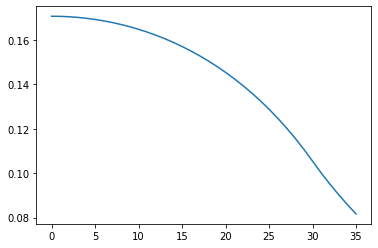

100.0


In [8]:
import numpy as np
import pandas as pd
import scipy.special as sp
import math as math
import matplotlib.pyplot as plt
from scipy.integrate import quad

# exemple pour verif des calculs: https://inowas.com/tools/t02-groundwater-mounding-calculator/

hi = 35#charge initiale (L)
# h = # charge au cours du temps à x (L)  ==> A calculer !!!
w = 0.05#taux de recharge (infiltration) (L/T)
K = 2#cond hydr (L/T)
b = 6#épaisseur moyenne aquifère (L)
Sy = 0.12#capacité spécifique (-)
t = 10#temps écoulé depuis début infiltration (T)
l = 30#demilongueur du bassin d'infiltration (L)
a = 10#demilargeur du bassin d'infiltration (L)
#x = 0#distance au centre du bassin selon x (L)
#y = 0#distance au centre du bassin selon y (L)
D = K*b/Sy    #diffusivité (L2/T)


# calcul de la fonction S*(alpha,beta)

def Shantush(tau,alpha,beta):
    return sp.erf(alpha/np.sqrt(tau)) * sp.erf(beta/np.sqrt(tau))

#verif fonction HANTUSH
alpha = 0.3
beta = 0.22
Stest = quad(Shantush, 0, 1, args=(alpha,beta))
print("calc S* = ", Stest[0], "valeur abaque S* = 0.2433")


coupe = np.arange(0,36,1)
y = 0
h = []
for x in coupe:
    dum1 = quad(Shantush, 0, 1, args=((l+x)/(np.sqrt(4*D*t)),(a+y)/(np.sqrt(4*D*t))))
    dum2 = quad(Shantush, 0, 1, args=((l+x)/(np.sqrt(4*D*t)),(a-y)/(np.sqrt(4*D*t))))
    dum3 = quad(Shantush, 0, 1, args=((l-x)/(np.sqrt(4*D*t)),(a+y)/(np.sqrt(4*D*t))))
    dum4 = quad(Shantush, 0, 1, args=((l-x)/(np.sqrt(4*D*t)),(a-y)/(np.sqrt(4*D*t))))
    h.append(np.sqrt((w/2/K)*D*t*(dum1[0]+dum2[0]+dum3[0]+dum4[0]) + hi**2) )

h = np.array(h)
delta = h-hi
plt.plot(coupe,delta)
plt.show()
print(D)